# Título de la Práctica: Análisis de Sentimiento en reviews

Utilizaremos el csv de `andalucia_hoteles.csv`. 


## Paso 1: Análisis de Sentimiento con NTLK

En esta etapa, utilizaremos NLTK, una biblioteca de procesamiento de lenguaje natural, para realizar el análisis de sentimiento en las reviews. Calcula tanto el sentimiento (positivo, negativo o neutral) como la polaridad (cuán positivo o negativo es el texto) de cada review. Añade una columna a tus datos que contenga esta información.

## Paso 2: Visualización de Resultados

Crea gráficos de barras o gráficos circulares para mostrar la distribución de los sentimientos en las reviews. Esto te permitirá ver cuántos reviews son positivas, negativas o neutrales. También puedes representar la polaridad en un gráfico para comprender mejor el tono general de los tweets.

## Paso 3: Análisis de Resultados

Analiza los resultados y extrae conclusiones. Hazte preguntas como:

¿Cuál es la proporción de reviews positivas, negativas y neutrales?
¿Cuál es el sentimiento predominante en las reviews?
¿Puedes identificar tendencias o patrones en los datos?

Considera cómo este análisis de sentimiento podría ser útil en un contexto real, como la monitorización de la reputación de un hotel o la detección de tendencias en las redes sociales.

In [6]:
# Utilización de Vader

def get_nltk_sentiment(sentence):
    ss = sid.polarity_scores(sentence)
    print("Utilizando Vader: ",sentence, ss['compound'])
    return ss['compound']

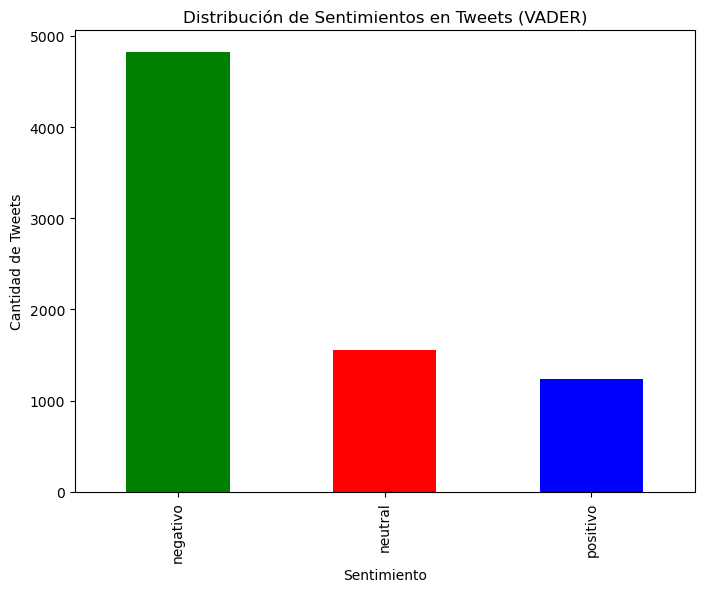

In [16]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de tweets (reemplaza 'tweets.csv' con el nombre de tu archivo)
df = pd.read_csv('andalucia_hoteles.csv')

# Inicializar el analizador de sentimiento VADER
analyzer = SentimentIntensityAnalyzer()

# Función para obtener la polaridad del sentimiento
def get_sentiment_polarity(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    if sentiment['compound'] >= 0.01:
        return 'positivo'
    elif sentiment['compound'] <= -0.01:
        return 'negativo'
    else:
        return 'neutral'

df['sentiment'] = df['review_text'].apply(get_sentiment_polarity)

# Visualización de resultados
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribución de Sentimientos en Tweets (VADER)')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.show()

